In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# read and merged data
# read data set from file csv
data_train_p1 = pd.read_excel("Data_Train_p1.xlsx")
data_train_p2 = pd.read_excel("Data_Train_p2.xlsx")

# merged data set 
data_train = pd.concat([data_train_p1, data_train_p2])

### Q2. Đối với cột Price, cho biết:
#### 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
#### 2. Độ lệch chuẩn của cột price?
#### 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm. Nhận xét về giá trị mean và median của tập dữ liệu.
#### 4. Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

In [18]:
# 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
# Giá cao nhất
max_price = data_train["Price"].max()
print("Giá cao nhất:", max_price)

# Giá thấp nhất
min_price = data_train["Price"].min()
print("Giá thấp nhất:", min_price)

# Giá trung bình
mean_price = data_train["Price"].mean()
print("Giá trung bình:", mean_price)

# Mức giá xuất hiện nhiều
mode_price = data_train["Price"].mode()[0]
print("Mức giá xuất hiện nhiều:", mode_price)


Giá cao nhất: 79512
Giá thấp nhất: 1759
Giá trung bình: 9087.545582178958
Mức giá xuất hiện nhiều: 10262


In [19]:
# 2. Độ lệch chuẩn của cột price?
std_price = data_train["Price"].std()
print("Độ lệch chuẩn:", std_price)


Độ lệch chuẩn: 4611.411872913706


In [32]:
# 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
# Tính mean và median của cột Price
mean_price = data_train['Price'].mean()
median_price = data_train['Price'].median()
# So sánh mean và median
if mean_price > median_price:
    print("Mean lớn hơn Median, có sự lệch phải (right-skewed).")
elif mean_price < median_price:
    print("Mean nhỏ hơn Median, có sự lệch trái (left-skewed).")
else:
    print("Mean và Median gần nhau, phân phối đối xứng.")

Mean lớn hơn Median, có sự lệch phải (right-skewed).


In [26]:
# Số lượng các điểm dữ liệu trong cột "Price"
number_of_data_points = len(data_train["Price"].unique())
print(number_of_data_points)

# Số lượng các bin trong cột "Price"
import numpy as np
bins = int(1 + np.log2(number_of_data_points))
print(bins)

1870
11


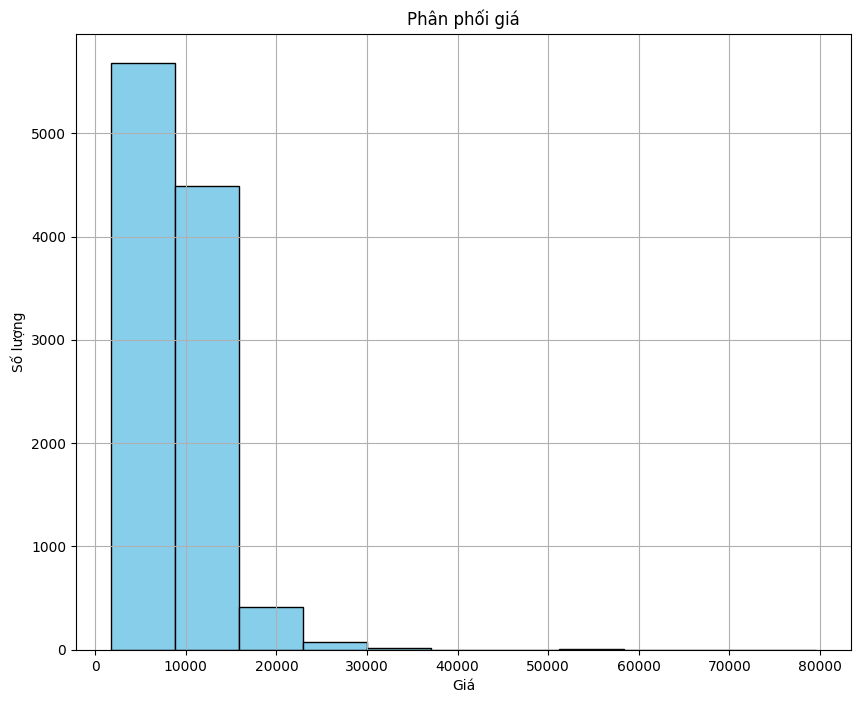

In [31]:
# Vẽ histogram của cột Price
# Vẽ đồ thị histogram
plt.figure(figsize=(10, 8))
plt.hist(data_train['Price'], bins=11, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

Khi mean lớn hơn median và có sự lệch phải (right-skewed), điều này thường cho thấy một số mẫu có giá trị cao hơn, làm tăng mean và kéo mean về phía giá trị lớn. Trong trường hợp này, một số mẫu có giá trị lớn hơn giữa tập dữ liệu, khiến mean lớn hơn median.

Như vậy, dữ liệu có xu hướng tập trung về các giá trị nhỏ, trong khi có một số ít các giá trị lớn hơn, tạo nên phân phối dữ liệu cách xa trung tâm. Điều này có thể ảnh hưởng đến tính đại diện của mean, khi mean có thể bị ảnh hưởng bởi các giá trị cao hơn.

Nhìn chung, với sự lệch phải và mean lớn hơn median, có thể kết luận rằng dữ liệu phân phối cách xa trung tâm và có một số mẫu có giá trị lớn, làm tăng mean so với median. Điều này thường thể hiện sự không đồng đều trong phân phối giá trị của tập dữ liệu.


## Q5. Xử lý dữ liệu missing?(xử lí thêm phần duplicate dữ liệu)
#### Do missing value rất rất nhỏ nên em chọn phương pháp xóa bỏ các dòng bị thiếu dữ liệu.

In [3]:
df_no_missing =data_train.dropna()

#### Kiểm tra data có bị duplicate dữ liệu không

In [4]:
duplicate_rows = df_no_missing[df_no_missing.duplicated()]
print("Các dòng trùng lặp:")
print(duplicate_rows)

Các dòng trùng lặp:
          Airline Date_of_Journey    Source Destination  \
809   Jet Airways       9/06/2019     Delhi      Cochin   
977   Jet Airways       6/06/2019     Delhi      Cochin   
1002     SpiceJet      24/03/2019  Banglore   New Delhi   
1135    Air India       9/05/2019     Delhi      Cochin   
1234  Jet Airways      24/06/2019     Delhi      Cochin   
...           ...             ...       ...         ...   
1734  Jet Airways      24/06/2019     Delhi      Cochin   
1759  Jet Airways      21/03/2019     Delhi      Cochin   
1856    Air India      15/05/2019   Kolkata    Banglore   
1863  Jet Airways      27/06/2019     Delhi      Cochin   
1868  Jet Airways      24/03/2019   Kolkata    Banglore   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
809   DEL → JAI → BOM → COK    05:30  04:25 10 Jun  22h 55m     2 stops   
977   DEL → JAI → BOM → COK    05:30  04:25 07 Jun  22h 55m     2 stops   
1002              BLR → DEL    05:45         0

#### Nhận thấy có nhiều dòng bi duplicate nên em sẽ drop chúng đi.

In [5]:
df_cleaned = df_no_missing.drop_duplicates()

# Visualize dữ liệu dạng bảng hoặc đồ thị: 


#### **1. Giá vé tăng khi nào ?**


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\931602302.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly = df_cleaned_copy['Price'].resample('M').mean().fillna(method='ffill').reindex(pd.to_datetime(date_range))


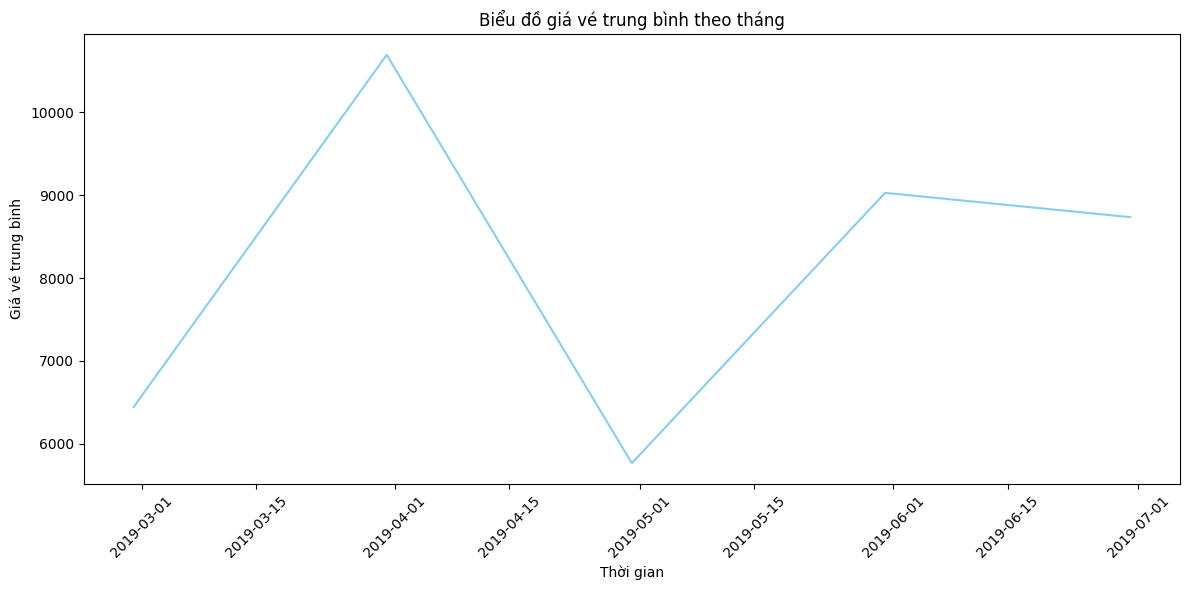

In [6]:
#Sao chép để không bị lỗi
df_cleaned_copy = df_cleaned.copy()
# Thêm dữ liệu vào cuối tháng 2 và vào đầu tháng 7 để có thể nhìn được toàn bộ dữ liệu
# Thêm dữ liệu vào cuối tháng 2
df_cleaned_copy = pd.concat([df_cleaned_copy, pd.DataFrame({
    'Airline': 'IndiGo',
    'Date_of_Journey': '28/02/2019',
    'Source': 'Delhi',
    'Destination': 'Cochin',
    'Route': 'DEL → HYD → COK',
    'Dep_Time': '06:50',
    'Arrival_Time': '16:10',
    'Duration': '9h 20m',
    'Total_Stops': '1 stop',
    'Additional_Info': 'No info',
    'Price': 6442
}, index=[df_cleaned_copy.index.max() + 1])], ignore_index=True)
# Thêm dữ liệu vào đầu tháng 7
df_cleaned_copy = pd.concat([df_cleaned_copy, pd.DataFrame({
    'Airline': 'IndiGo',
    'Date_of_Journey': '01/07/2019',
    'Source': 'Delhi',
    'Destination': 'Cochin',
    'Route': 'DEL → HYD → COK',
    'Dep_Time': '06:50',
    'Arrival_Time': '16:10',
    'Duration': '9h 20m',
    'Total_Stops': '1 stop',
    'Additional_Info': 'No info',
    'Price': 6442
}, index=[df_cleaned_copy.index.max() + 1])], ignore_index=True)
# Chuyển cột 'Date_of_Journey' thành kiểu dữ liệu datetime
df_cleaned_copy['Date_of_Journey'] = pd.to_datetime(df_cleaned_copy['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Đặt cột 'Date_of_Journey' làm index để sử dụng resample
df_cleaned_copy.set_index('Date_of_Journey', inplace=True)

# Tạo chuỗi ngày từ tháng đầu tiên đến tháng cuối cùng trong dữ liệu
date_range = pd.date_range(df_cleaned_copy.index.min(), df_cleaned_copy.index.max(), freq='M')

# Sử dụng reindex để đảm bảo rằng DataFrame có tất cả các tháng trong chuỗi ngày
df_monthly = df_cleaned_copy['Price'].resample('M').mean().fillna(method='ffill').reindex(pd.to_datetime(date_range))

# Vẽ biểu đồ giá vé trung bình theo tháng
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, color='skyblue')
plt.title('Biểu đồ giá vé trung bình theo tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá vé trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Nhận xét:
##### *1.1 Giá vé bắt đầu tăng từ đầu tháng 3 đến đầu tháng 4.*
##### *1.2 Ngay sau đó giá vé lại giảm mạnh đến đầu tháng 5.*
##### *1.3 Từ đầu tháng 5 giá vé lại tăng, mức tăng trung bình khoảng 3000 cho đến đầu tháng 6.*
##### *1.4 Trong tháng 6 giá vé có xu hướng giảm nhẹ.*

#### **2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng) ?**


In [7]:
# Xem các giá trị duy nhất trong cột Total_Stops
print(df_cleaned['Total_Stops'].unique())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\1573602458.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stops_count.index, y=stops_count.values, palette=colors, ax=axes[1])


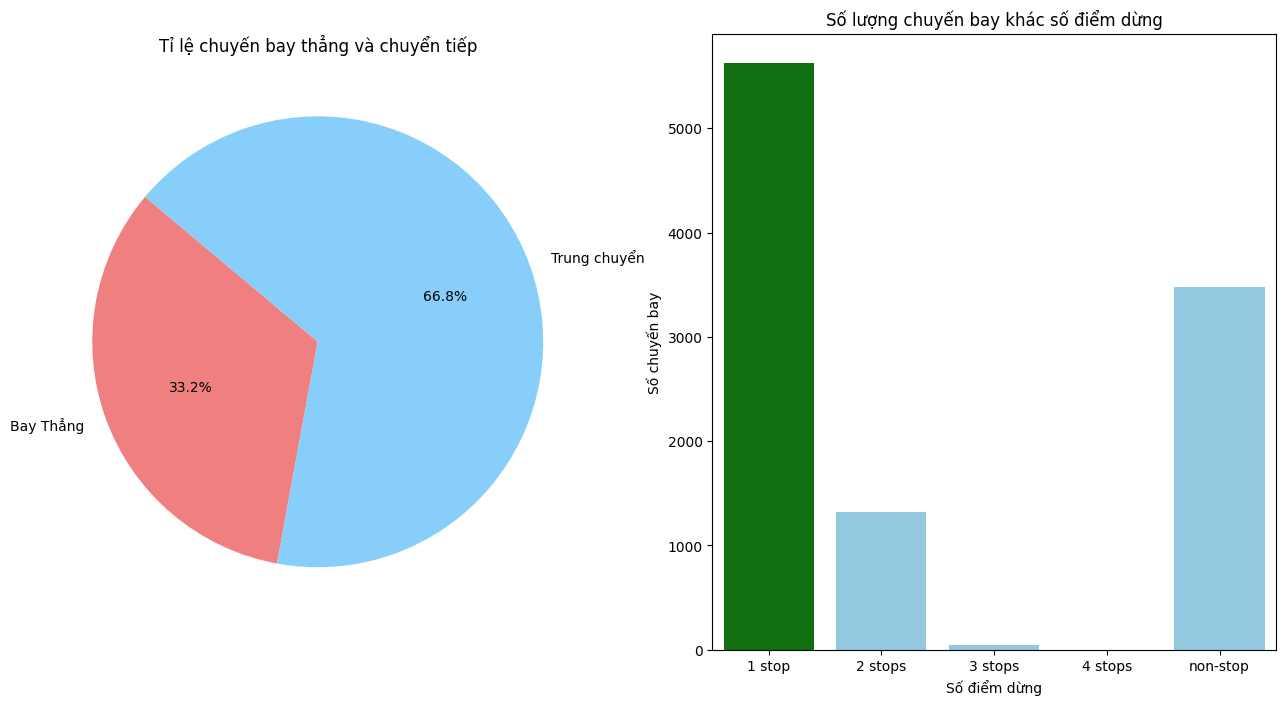

In [9]:
# Tính số lượng và tỷ lệ chuyến bay trực tiếp và chuyển tiếp
direct_flights_count = len(df_cleaned[df_cleaned['Total_Stops'] == 'non-stop'])
transit_flights_count = len(df_cleaned[df_cleaned['Total_Stops'] != 'non-stop'])
total_flights = len(df_cleaned)

direct_flights_ratio = direct_flights_count / total_flights
transit_flights_ratio = transit_flights_count / total_flights

# Đếm số chuyến bay có số lượng dừng khác nhau
stops_count = df_cleaned['Total_Stops'].value_counts().sort_index()

# Vẽ cả biểu đồ hình tròn và biểu đồ cột trong cùng một đầu ra
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Biểu đồ hình tròn
labels = ['Bay Thẳng', 'Trung chuyển']
sizes = [direct_flights_ratio, transit_flights_ratio]
colors = ['lightcoral', 'lightskyblue']
axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Tỉ lệ chuyến bay thẳng và chuyển tiếp')

# Biểu đồ cột
colors = ['green' if x == stops_count.index[0] else 'skyblue' for x in stops_count.index]
sns.barplot(x=stops_count.index, y=stops_count.values, palette=colors, ax=axes[1])
axes[1].set_title('Số lượng chuyến bay khác số điểm dừng')
axes[1].set_xlabel('Số điểm dừng')
axes[1].set_ylabel('Số chuyến bay')

plt.show()

#### Nhận xét:
##### *2.1 Tỷ lệ chuyến bay thẳng chỉ bằng một nửa so với chuyến bay có điểm dừng.*
##### *2.2 Trong chuyến bay có điểm dừng thì 1 điểm dừng là phổ biến nhất, 3 hay 4 điểm dừng là rất ít.*


#### **3. Thành phố nào có lượng chuyến bay nhiều nhất?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3614339274.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts_by_source.index, y=flight_counts_by_source.values, palette=colors_source, ax=axes[0]),axes[0].set_title('Số lượng chuyến bay theo nguồn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3614339274.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts_by_destination.index, y=flight_counts_by_destination.values, palette=colors_destination, ax=axes[1])


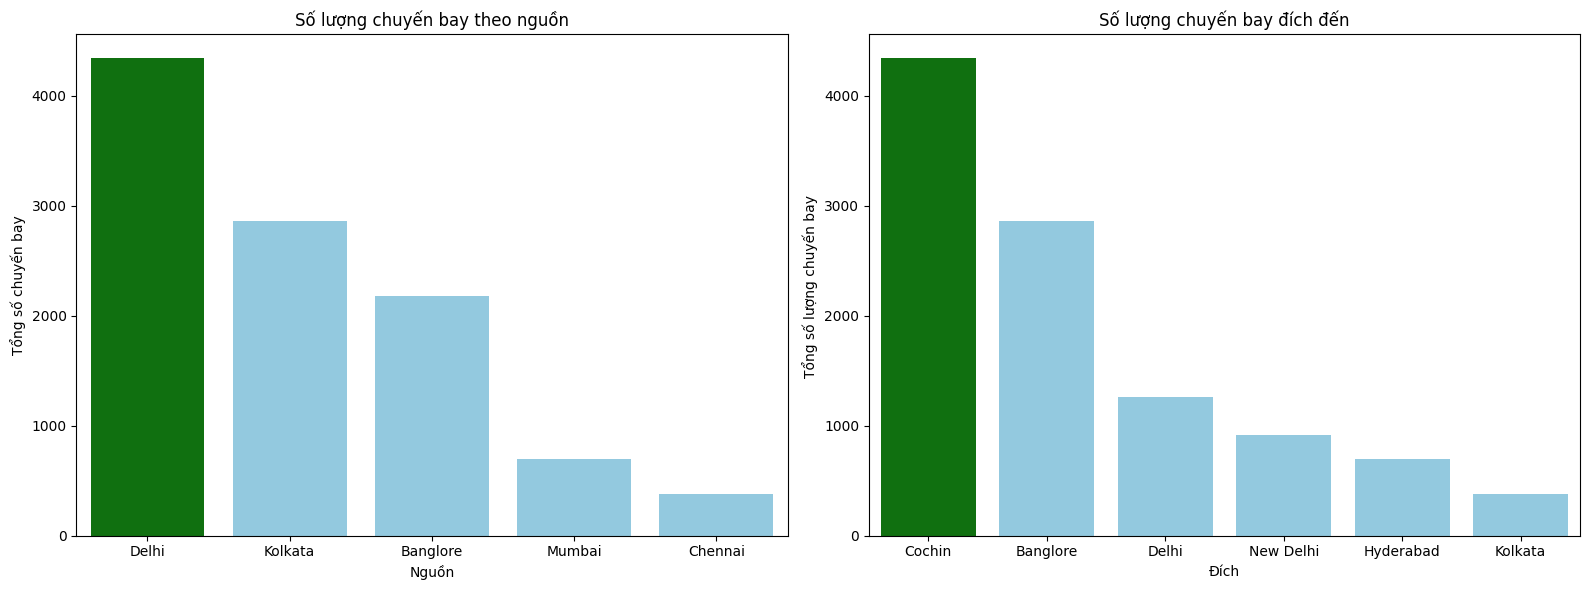

In [12]:
flight_counts_by_source = df_cleaned['Source'].value_counts()
flight_counts_by_destination = df_cleaned['Destination'].value_counts()

common_palette = 'viridis'

#Vẽ cả hai biểu đồ
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Biểu đồ cột theo chuyến bay khỏi hành
colors_source = ['green' if x == flight_counts_by_source.index[0] else 'skyblue' for x in flight_counts_by_source.index]
sns.barplot(x=flight_counts_by_source.index, y=flight_counts_by_source.values, palette=colors_source, ax=axes[0]),axes[0].set_title('Số lượng chuyến bay theo nguồn')
axes[0].set_xlabel('Nguồn')
axes[0].set_ylabel('Tổng số chuyến bay')

# Biểu đồ cột theo chuyến bay điểm đến
colors_destination = ['green' if x == flight_counts_by_destination.index[0] else 'skyblue' for x in flight_counts_by_destination.index]
sns.barplot(x=flight_counts_by_destination.index, y=flight_counts_by_destination.values, palette=colors_destination, ax=axes[1])
axes[1].set_title('Số lượng chuyến bay đích đến')
axes[1].set_xlabel('Đích')
axes[1].set_ylabel('Tổng số lượng chuyến bay ')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

#### Nhận xét:
##### *3.1 Số chuyến bay khởi hành từ Delhi là cao nhất sau đó là Kolkata, Banglore, Mumbai, Chennai,...*
##### *3.2 Số lượng chuyến bay đáp xuống CoChin là cao nhất sau đó là Banglore, Delhi, New Delhi,...*

#### **4. Hãng máy bay nào có số chuyến bay nhiều/thấp nhất?**

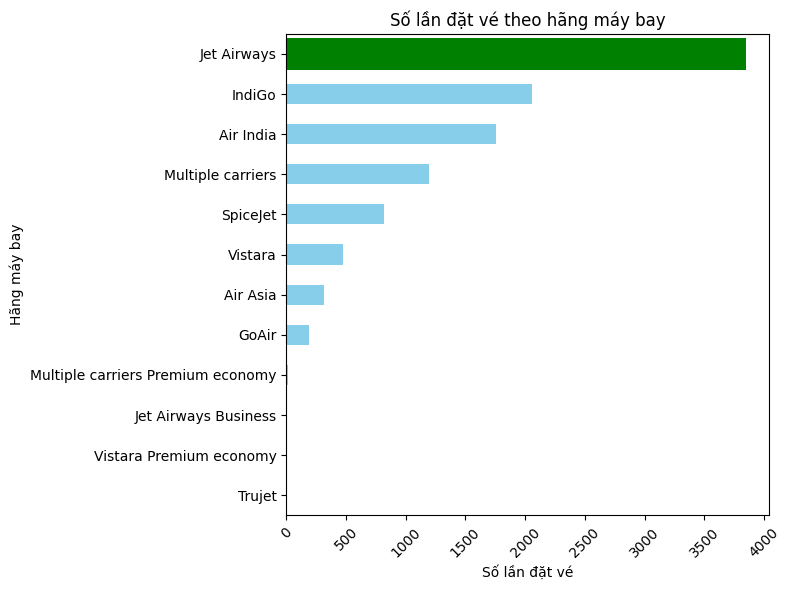

Hãng máy bay được đặt vé nhiều nhất: Jet Airways
Airline
Jet Airways    3850
Name: count, dtype: int64
Hãng máy bay được đặt vé ít nhất: Trujet
Airline
Trujet    1
Name: count, dtype: int64


In [58]:
# Phân tích hãng máy bay được đặt vé nhiều nhất và ít nhất
airline_counts = data_train['Airline'].value_counts().sort_values()
most_booked_airline = airline_counts.idxmax()
least_booked_airline = airline_counts.idxmin()
n = len(airline_counts) - 1
# Trực quan hóa số lần đặt vé của các hãng máy bay
plt.figure(figsize=(8, 6))
airline_counts.plot(kind='barh', color='skyblue')
plt.title('Số lần đặt vé theo hãng máy bay')
plt.barh(n, airline_counts.iloc[n], color='green')
plt.xlabel('Số lần đặt vé')
plt.ylabel('Hãng máy bay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Hãng máy bay được đặt vé nhiều nhất: {most_booked_airline}')
print(most_booked_airlines)
print(f'Hãng máy bay được đặt vé ít nhất: {least_booked_airline}')
print(least_booked_airlines)


#### **5. Tháng cao điểm?**

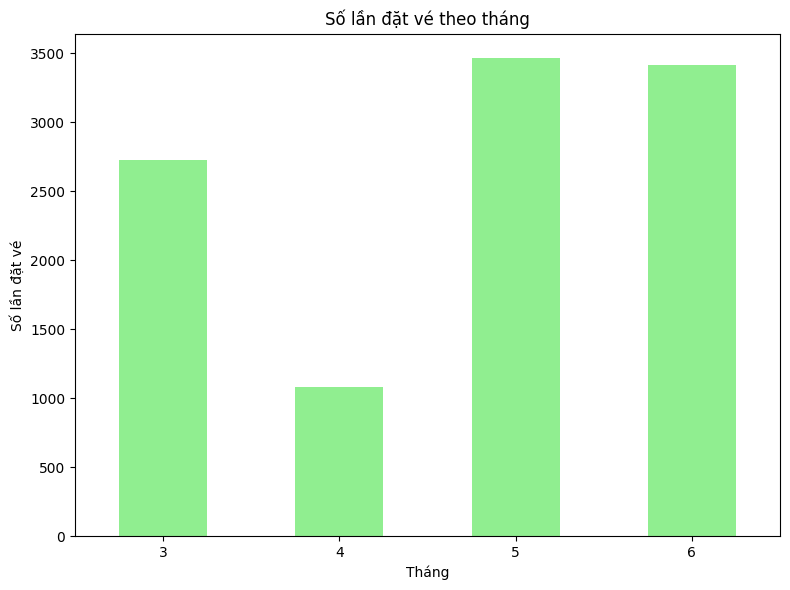

Tháng cao điểm là tháng số: 5


In [60]:
# Phân tích tháng là tháng cao điểm
data_train['Date_of_Journey'] = pd.to_datetime(data_train['Date_of_Journey'])
data_train['Month'] = data_train['Date_of_Journey'].dt.month

month_counts = data_train['Month'].value_counts().sort_index()

# Trực quan hóa số lần đặt vé theo tháng
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Số lần đặt vé theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lần đặt vé')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

peak_month = month_counts.idxmax()
print(f'Tháng cao điểm là tháng số: {peak_month}')

## **Ngoài các đặc trưng trong tập dữ liệu, các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay**

#### **1. 19120706_Võ Hữu Anh Tuấn -Yếu tố thời gian bắt đầu chuyến bay ảnh hưởng đến giá vé máy bay**

In [14]:
# sử dụng data mới 
df_add = pd.read_csv("Clean_Dataset.csv")

In [15]:
# Xem các thuộc tính trong cột departure_time
print(df_add['departure_time'].unique())


['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3746560344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time', y='price', data=df_add, palette=boxplot_colors)


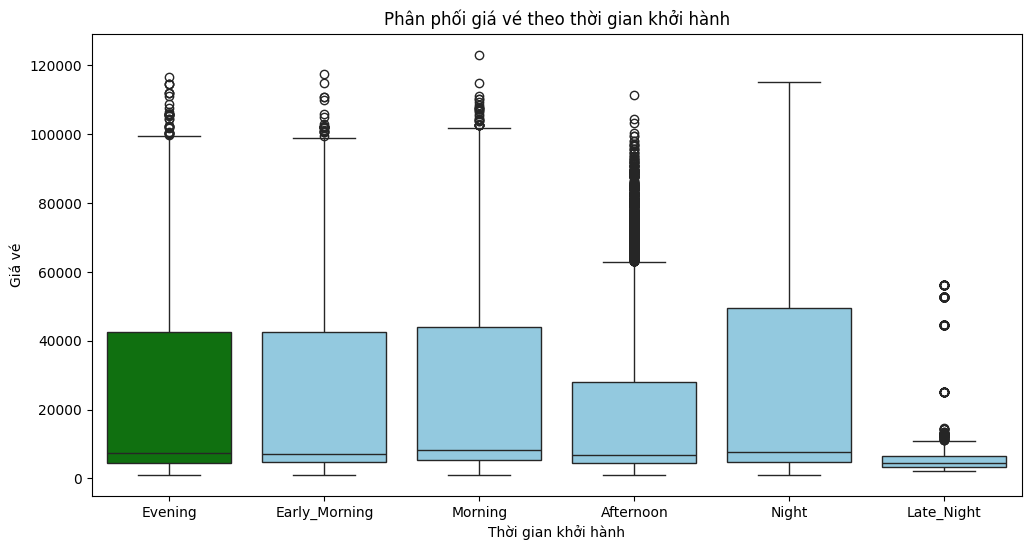

In [18]:
plt.figure(figsize=(12, 6))

departure_times = df_add['departure_time'].unique()

boxplot_colors = ['green' if time == departure_times[0] else 'skyblue' for time in departure_times]

sns.boxplot(x='departure_time', y='price', data=df_add, palette=boxplot_colors)
plt.title('Phân phối giá vé theo thời gian khởi hành')
plt.xlabel('Thời gian khởi hành')
plt.ylabel('Giá vé')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\1267254144.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\1267254144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)


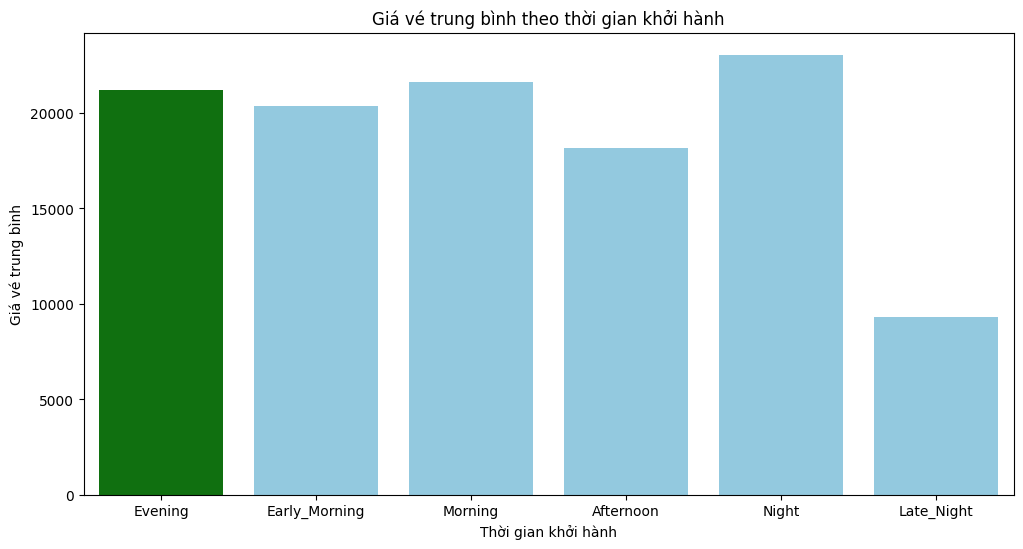

In [19]:
plt.figure(figsize=(12, 6))

# Lấy danh sách thời gian khởi hành
departure_times = df_add['departure_time'].unique()

# Màu sắc cho biểu đồ cột
barplot_colors = ['green' if time == departure_times[0] else 'skyblue' for time in departure_times]

sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)
plt.title('Giá vé trung bình theo thời gian khởi hành')
plt.xlabel('Thời gian khởi hành')
plt.ylabel('Giá vé trung bình')

plt.show()

#### Nhận xét:  
##### *Nhìn vào hai biểu đồ ta có thể thấy rằng có sự liên quan giữa giá vé và thời gian bay.*
##### *Các chuyến bay vào buổi tối thì có giá cao vì nhiều người có thể đi giờ này.*
##### *Còn các chuyến bay vào ban đêm thì có giá thấp hơn.* 
***Đó chỉ là 1 trong những lí do khiến giá vé thay đổi còn nhiều yếu tố khác nữa dẫn đến sự thay đổi  vì vậy chúng ta thấy có nhiều outlier ở các cột trong biểu đồ 1***